In [44]:
#from icepyx import query as ipd
import icepyx as ipx

import os
import shutil
from pathlib import Path
from pprint import pprint
import geopandas as gpd
from shapely.ops import unary_union

import pandas as pd

%matplotlib inline

In [45]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import os
os.chdir("/glade/u/home/fsapienza/CloudMask")

from utils_atl06 import *
from utils import drainage_basin

## Example No1

Retrieving ATL06 data from bounding box

In [1]:
spatial_extent = [ -50.71,  65.73, -45.32,  68.08]
date_range = ['2019-06-01','2019-06-05']

In [ ]:
df = read_atl06(spatial_extent, 
                date_range, 
                time_start = "06:00:00", 
                time_end = "18:00:00",
                path = "./data/ATL06", 
                user = 'fsapienza', 
                email = 'fsapienza@berkeley.edu')

In [ ]:
df

In [15]:
df[df.atl06_quality_summary == 1].shape

(5649, 32)

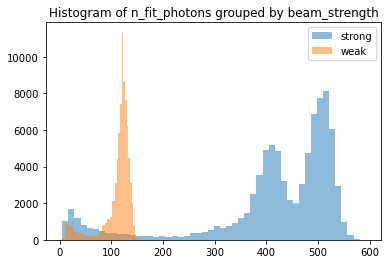

In [16]:
from utils import hist_df
hist_df(df[df.n_fit_photons < 10e3], 'n_fit_photons', 'beam_strength')

In [17]:
df.head()

,ground_track,time,segment_id,beam_strength,latitide,longitude,h_li,dh_fit_dx,dh_fit_dy,snr,...,cloud_flg_atm,msw_flag,layer_flag,bckgrd,e_bckgrd,q_flag_1,q_flag_2,q_flag_3,q_flag_4,q_flag_5
0,gt1l,2019-06-01 07:18:22.747013+00:00,371978,strong,66.862169,-45.326436,3.402823e+38,3.402823e+38,3.402823e+38,3.402823e+38,...,1,1,1,3.402823e+38,3.402823e+38,1,1,0,1,1
1,gt1l,2019-06-01 07:18:22.749913+00:00,371979,strong,66.862351,-45.326488,3.402823e+38,3.402823e+38,3.402823e+38,3.402823e+38,...,1,1,1,3.402823e+38,3.402823e+38,1,1,0,1,1
2,gt1l,2019-06-01 07:18:22.761213+00:00,371983,strong,66.863066,-45.326704,3.402823e+38,3.402823e+38,3.402823e+38,3.402823e+38,...,1,1,1,3.402823e+38,3.402823e+38,1,1,0,1,1
3,gt1l,2019-06-01 07:18:22.924563+00:00,372041,strong,66.873399,-45.329752,3.402823e+38,3.402823e+38,3.402823e+38,3.402823e+38,...,1,1,1,3.402823e+38,3.402823e+38,1,1,0,1,1
4,gt1l,2019-06-01 07:18:23.076715+00:00,372095,strong,66.883032,-45.332678,3.402823e+38,3.402823e+38,3.402823e+38,3.085928e-01,...,1,1,1,3.402823e+38,3.402823e+38,1,1,1,1,1


In [18]:
all( np.unique(df['atl06_quality_summary']) == [0,1] )

True

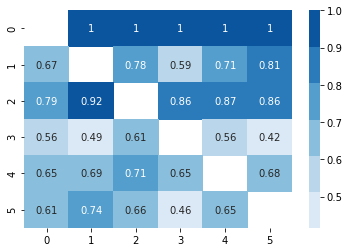

In [19]:
cond_matrix = conditional_heatplot(df, ['atl06_quality_summary', 'q_flag_1', 'q_flag_2', 'q_flag_3', 'q_flag_4', 'q_flag_5'])

## Example No2 

Here we are going to retrieve granules included in one speficic granule basin in Greenland

<div>
<img src="https://icesat4.gsfc.nasa.gov/cryo_data/drainage_divides/Grn_Drainage_Systems.png" align="center" width="300"/>
</div>

#### Granule basin

In [4]:
#from osgeo import osr

#os.chdir("/glade/u/home/fsapienza/CloudMask/drainage_basin")

In [37]:
basin_id = 6.2

polygon = drainage_basin(basin = basin_id, 
                         polygon_size = 5000)

date_range = ['2019-06-10', '2019-06-11']

In [38]:
full_polygon = drainage_basin(basin = 6.2)

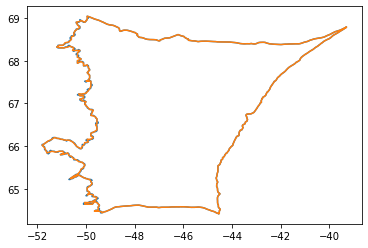

In [39]:
longitudes_icepyx, latitudes_icepyx = polygon.exterior.xy
longitudes, latitudes = full_polygon.exterior.xy

plt.plot(longitudes, latitudes)
plt.plot(longitudes_icepyx, latitudes_icepyx)

In [40]:
os.chdir("/glade/u/home/fsapienza/CloudMask")

In [41]:
spatial_extent = list(polygon.exterior.coords)

In [43]:
df = read_atl06(spatial_extent, 
                date_range, 
                time_start = "15:00:00", 
                time_end = "16:59:59",
                path = "./data/new_ATL06", 
                user = 'fsapienza', 
                email = 'fsapienza@berkeley.edu')

Available Granules: ['ATL06_20190610191843_11230305_003_01.h5']
Total number of data order requests is  1  for  1  granules.
Data request  1  of  1  is submitting to NSIDC


ParseError: syntax error: line 1, column 49 (<string>)

In [35]:
longitude_df = df.longitude.to_numpy()
latitude_df  = df.latitude.to_numpy()

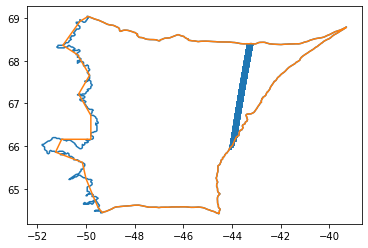

In [36]:
plt.plot(longitudes, latitudes)
plt.plot(longitudes_icepyx, latitudes_icepyx)
plt.scatter(longitude_df, latitude_df, 0.5)

## Example No3

Combining different Drainage basins

In [50]:
basins_ids = [1.1, 1.2, 1.3, 1.4,
              2.1, 2.2, 
              3.1, 3.2, 3.3, 
              4.1, 4.2, 4.3,
              5.0,
              6.1, 6.2,
              7.1, 7.2, 
              8.1, 8.2]

In [103]:
my_basins = basins_ids
#my_basins = [2.1, 2.2]

polygons = [drainage_basin(basin_id) for basin_id in my_basins ]

poly_full = unary_union(polygons)

poly_full_simplify = poly_full.simplify(tolerance=0.5)

9918 122


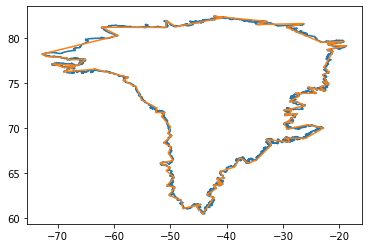

In [104]:
x, y = poly_full.exterior.xy
x_simp, y_simp = poly_full_simplify.exterior.xy

print(len(x), len(x_simp))

plt.plot(x,y)
plt.plot(x_simp, y_simp)

In [105]:
date_range = ['2019-06-10', '2019-06-10']

spatial_extent = list(poly_full_simplify.exterior.coords)

In [108]:
df = read_atl06(spatial_extent, 
                date_range, 
                time_start = "15:00:00", 
                time_end = "15:14:59",
                path = "./data/new_ATL06", 
                user = 'fsapienza', 
                email = 'fsapienza@berkeley.edu')

Available Granules: ['ATL06_20190610191334_11230304_003_01.h5', 'ATL06_20190610191843_11230305_003_01.h5', 'ATL06_20190610204751_11240304_003_01.h5', 'ATL06_20190610205300_11240305_003_01.h5', 'ATL06_20190611043353_11290303_003_01.h5', 'ATL06_20190611043918_11290304_003_01.h5', 'ATL06_20190611060811_11300303_003_01.h5', 'ATL06_20190611061336_11300304_003_01.h5', 'ATL06_20190611074228_11310303_003_01.h5', 'ATL06_20190611074753_11310304_003_01.h5', 'ATL06_20190611184755_11380304_003_01.h5', 'ATL06_20190611185304_11380305_003_01.h5', 'ATL06_20190611202212_11390304_003_01.h5', 'ATL06_20190611202721_11390305_003_01.h5', 'ATL06_20190612054231_11450303_003_01.h5', 'ATL06_20190612054756_11450304_003_01.h5', 'ATL06_20190612182215_11530304_003_01.h5', 'ATL06_20190612182724_11530305_003_01.h5', 'ATL06_20190612195632_11540304_003_01.h5', 'ATL06_20190612200142_11540305_003_01.h5', 'ATL06_20190613051652_11600303_003_01.h5', 'ATL06_20190613052217_11600304_003_01.h5', 'ATL06_20190613065109_11610303_00

In [109]:
df.head()

,ground_track,time,segment_id,beam_strength,time_2,latitude,longitude,h_li,dh_fit_dx,dh_fit_dy,...,cloud_flg_atm,msw_flag,layer_flag,bckgrd,e_bckgrd,q_flag_1,q_flag_2,q_flag_3,q_flag_4,q_flag_5
0,gt1l,2019-06-10 19:18:31.671569+00:00,545265,strong,2019-06-10 19:18:50.671569,81.821748,-33.205490,292.474152,-0.595139,3.402823e+38,...,1,3,0,1544938.50,2312064.00,1,1,0,0,0
1,gt1l,2019-06-10 19:18:31.674371+00:00,545266,strong,2019-06-10 19:18:50.674371,81.821575,-33.205807,280.050690,-0.690392,-1.518472e-01,...,1,3,0,1810824.75,2312071.50,1,0,0,0,0
2,gt1l,2019-06-10 19:18:31.677170+00:00,545267,strong,2019-06-10 19:18:50.677170,81.821401,-33.206124,266.137299,-0.554570,-1.567262e-01,...,1,3,0,2253673.00,2309152.75,1,0,0,0,0
3,gt1l,2019-06-10 19:18:31.679975+00:00,545268,strong,2019-06-10 19:18:50.679975,81.821228,-33.206442,255.120560,-0.003246,-1.469671e-01,...,1,3,0,2609186.50,2309161.00,0,0,0,0,0
4,gt1l,2019-06-10 19:18:31.682789+00:00,545269,strong,2019-06-10 19:18:50.682789,81.821055,-33.206765,255.104111,-0.001634,-1.108392e-01,...,1,3,0,2747718.00,2309169.50,0,0,0,0,0


In [110]:
longitude_df = df.longitude.to_numpy()
latitude_df  = df.latitude.to_numpy()

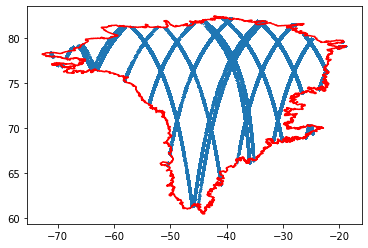

In [116]:
plt.plot(x,y, 'r')
#plt.plot(longitudes_icepyx, latitudes_icepyx)
plt.scatter(longitude_df, latitude_df, 0.1)

In [ ]:
from shapely import geometry

In [ ]:
def basinid_2_poly (basin_id):
    
    basin = drainage_basin(basin = 6.1, 
                           polygon_size = 'full')

In [51]:
poly61 = drainage_basin(basin = 6.1, 
                         polygon_size = 'full')

poly62 = drainage_basin(basin = 6.2, 
                         polygon_size = 'full')

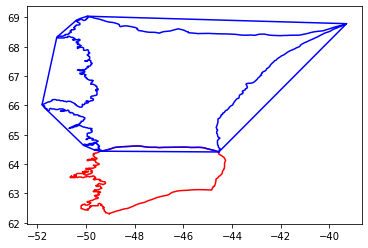

In [52]:
x_61, y_61 = poly61.exterior.xy
x_62, y_62 = poly62.exterior.xy
x_62_convex, y_62_convex = poly62.convex_hull.exterior.xy

plt.plot(x_61, y_61, 'r')
plt.plot(x_62, y_62, 'b')
plt.plot(x_62_convex, y_62_convex, 'b')
plt.show()

In [76]:
polygons = [poly61, poly62]

poly_full = unary_union(polygons)

In [66]:
poly_full_simplify = poly_full.simplify(tolerance=0.01)

In [67]:
x, y = poly_full.exterior.xy
x_simp, y_simp = poly_full_simplify.exterior.xy

In [68]:
print(len(x))
print(len(x_simp))

21046
544


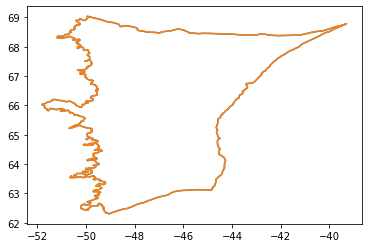

In [69]:
plt.plot(x,y)
plt.plot(x_simp, y_simp)